# Install required libraries for the practical

In [2]:
!pip install -q \
    xgboost \
    catboost \
    shap \
    scikit-learn \
    pandas \
    numpy \
    matplotlib \
    seaborn


# Step 0: Environment Setup and Reproducibility
# Dissertation: Consumer Trust in AI-Based Financial Advisory Tools

In [3]:
# Suppress unnecessary warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Advanced models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Explainable AI
import shap

# Utility
import random

# Set global random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

print("Environment setup complete.")
print("Random seed set to:", RANDOM_STATE)



Environment setup complete.
Random seed set to: 42


# Step 1: Load Dataset from Local System

In [4]:
from google.colab import files

# Upload file from local system
uploaded = files.upload()

# Get uploaded file name
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

# Load dataset into pandas DataFrame
df = pd.read_csv(file_name)

# Display basic dataset information
print("\nDataset loaded successfully.\n")
print("Dataset shape (rows, columns):", df.shape)

# Display first 5 rows
df.head()


Saving Fintech_user.csv to Fintech_user.csv
Uploaded file: Fintech_user.csv

Dataset loaded successfully.

Dataset shape (rows, columns): (27000, 31)


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


# Step 2: Dataset Inspection and Quality Assessment

In [5]:
import pandas as pd
import numpy as np

print("---- Dataset Shape ----")
print(df.shape)

print("\n---- Dataset Information ----")
df.info()

print("\n---- Column Names ----")
print(df.columns.tolist())

print("\n---- Data Types ----")
print(df.dtypes)

# Missing Values Analysis
print("\n---- Missing Values per Column ----")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

print("\n---- Percentage of Missing Values ----")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])

# Duplicate Records
duplicate_count = df.duplicated().sum()
print(f"\n---- Duplicate Rows ----\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicates (recommended)
df = df.drop_duplicates().reset_index(drop=True)

print("\nDataset shape after removing duplicates:")
print(df.shape)

# Basic Statistical Summary (Numerical Columns)
print("\n---- Summary Statistics (Numerical Features) ----")
df.describe()


---- Dataset Shape ----
(27000, 31)

---- Dataset Information ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_applic

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,26542.000000,26542.000000,26538.000000,18753.000000,26542.000000,26542.000000,26542.000000,26542.000000,26542.000000,26542.000000,...,26542.000000,26542.000000,26542.000000,26542.000000,26542.000000,26542.000000,26542.000000,23379.000000,26542.000000,26542.000000
mean,35365.680356,0.420993,32.206798,542.896710,3.323600,0.306345,28.043893,3.255670,0.074222,92.769987,...,0.422387,0.001281,0.018951,0.018311,0.004936,0.172896,0.018273,29.146798,0.909128,0.318514
std,20311.547052,0.493728,9.953419,61.128604,9.091126,1.051482,42.252050,8.912629,0.439291,88.842989,...,0.914111,0.035769,0.136355,0.134075,0.070081,0.378164,0.133939,21.961114,0.752105,0.465909
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17757.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35652.500000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.790000,0.000000
75%,53169.750000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# Step 3: Data Cleaning and Preparation

In [6]:
import numpy as np
import pandas as pd

# 1. Copy dataset to avoid unintended side effects
df = df.copy()


# 2. Basic sanity checks (DO NOT impute here)


# Fix unrealistic age values
df.loc[df["age"] < 18, "age"] = np.nan

# Ensure numeric columns are truly numeric
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# 3. Strip whitespace from categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip())

# 4. Final validation
print("Dataset shape after Step 3:")
print(df.shape)

print("\nRemaining missing values (top columns):")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Dataset shape after Step 3:
(26542, 31)

Remaining missing values (top columns):
credit_score          7789
rewards_earned        3163
age                     67
churn                    0
housing                  0
deposits                 0
user                     0
purchases_partners       0
purchases                0
cc_taken                 0
dtype: int64


# Step 4: EDA + Feature Engineering for Trust Modelling

Trust Label Distribution (%):
trust_label
0    51.9893
1    48.0107
Name: proportion, dtype: float64

Dataset shape after feature engineering:
(26542, 41)


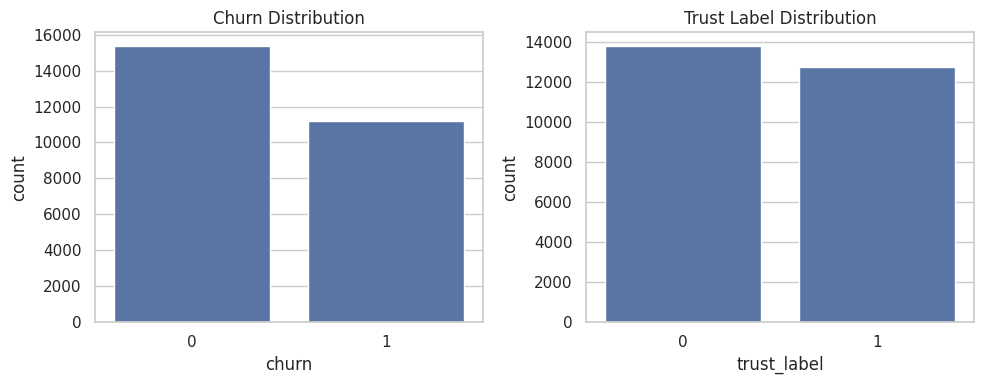

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Construct Trust Label (Target Variable)
# Trust = user did not churn AND did not leave for 2+ months
df["trust_label"] = (
    (df["churn"] == 0) &
    (df["left_for_two_month_plus"] == 0)
).astype(int)

print("Trust Label Distribution (%):")
print(df["trust_label"].value_counts(normalize=True) * 100)

# 2. Feature Engineering (Create df_fe)
df_fe = df.copy()

# Engagement & activity
df_fe["total_activity"] = (
    df_fe["deposits"] +
    df_fe["withdrawal"] +
    df_fe["purchases"] +
    df_fe["purchases_partners"]
)

df_fe["deposit_withdraw_ratio"] = (
    df_fe["deposits"] / (df_fe["withdrawal"] + 1)
)

df_fe["digital_engagement"] = (
    df_fe["app_downloaded"] +
    df_fe["web_user"] +
    df_fe["app_web_user"]
)

df_fe["mobile_preference"] = (
    df_fe["ios_user"] + df_fe["android_user"]
)

# Credit card behaviour
df_fe["cc_interest_score"] = (
    df_fe["cc_recommended"] +
    df_fe["cc_liked"] -
    df_fe["cc_disliked"]
)

df_fe["cc_conversion_ratio"] = (
    df_fe["cc_taken"] / (df_fe["cc_recommended"] + 1)
)

# Stability & loyalty
df_fe["absence_score"] = (
    df_fe["left_for_one_month"] +
    df_fe["left_for_two_month_plus"]
)

df_fe["loyalty_signal"] = (df_fe["absence_score"] == 0).astype(int)

# Reward sensitivity
df_fe["reward_intensity"] = (
    df_fe["rewards_earned"] / (df_fe["total_activity"] + 1)
)

print("\nDataset shape after feature engineering:")
print(df_fe.shape)

# 3. Distribution Plots (Churn & Trust)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x="churn", data=df_fe)
plt.title("Churn Distribution")

plt.subplot(1,2,2)
sns.countplot(x="trust_label", data=df_fe)
plt.title("Trust Label Distribution")

plt.tight_layout()
plt.show()






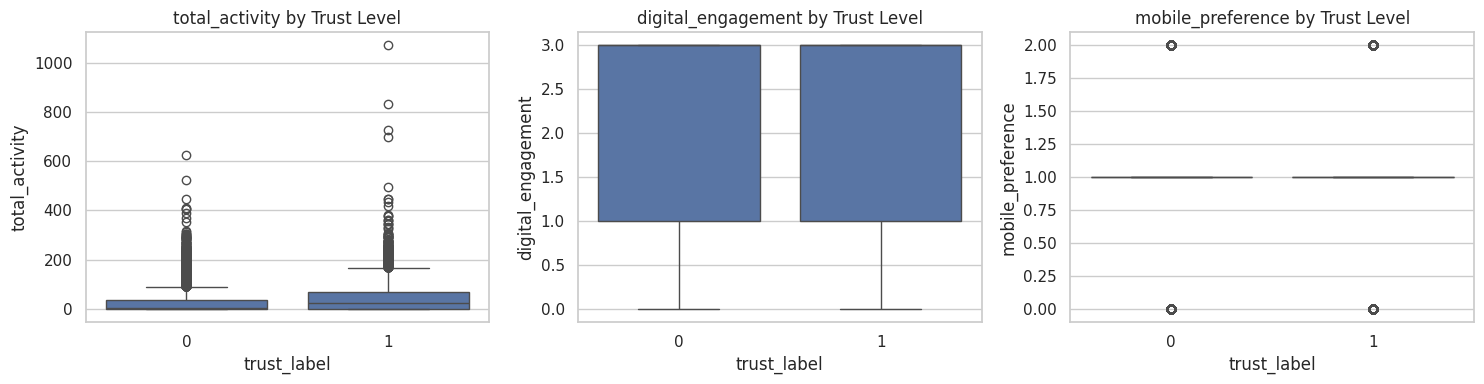

In [8]:
# 4. Engagement Features vs Trust
engagement_features = [
    "total_activity",
    "digital_engagement",
    "mobile_preference"
]

plt.figure(figsize=(15,4))
for i, col in enumerate(engagement_features, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x="trust_label", y=col, data=df_fe)
    plt.title(f"{col} by Trust Level")

plt.tight_layout()
plt.show()

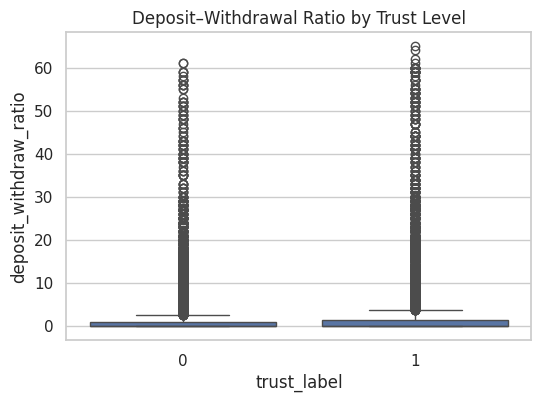

In [9]:
# 5. Financial Engagement Balance
plt.figure(figsize=(6,4))
sns.boxplot(x="trust_label", y="deposit_withdraw_ratio", data=df_fe)
plt.title("Deposit–Withdrawal Ratio by Trust Level")
plt.show()



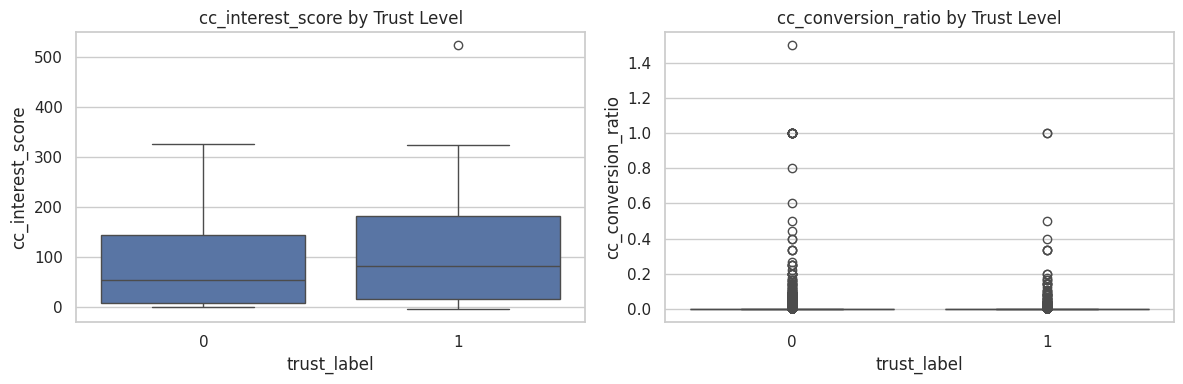

In [10]:
# 6. Credit Card Interaction Depth
cc_features = ["cc_interest_score", "cc_conversion_ratio"]

plt.figure(figsize=(12,4))
for i, col in enumerate(cc_features, 1):
    plt.subplot(1,2,i)
    sns.boxplot(x="trust_label", y=col, data=df_fe)
    plt.title(f"{col} by Trust Level")

plt.tight_layout()
plt.show()




Average Absence Score by Trust Label:
trust_label
0    0.355171
1    0.013576
Name: absence_score, dtype: float64


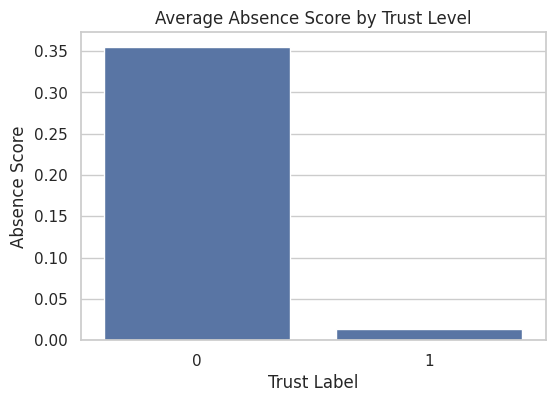

In [11]:
# 7. Stability & Absence Behaviour
print("\nAverage Absence Score by Trust Label:")
print(df_fe.groupby("trust_label")["absence_score"].mean())

plt.figure(figsize=(6,4))
sns.barplot(
    x=df_fe.groupby("trust_label")["absence_score"].mean().index,
    y=df_fe.groupby("trust_label")["absence_score"].mean().values
)
plt.title("Average Absence Score by Trust Level")
plt.xlabel("Trust Label")
plt.ylabel("Absence Score")
plt.show()



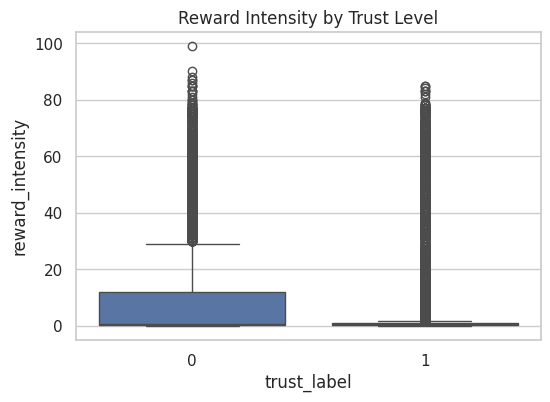

In [12]:
# 8. Reward Sensitivity vs Trust
plt.figure(figsize=(6,4))
sns.boxplot(x="trust_label", y="reward_intensity", data=df_fe)
plt.title("Reward Intensity by Trust Level")
plt.show()

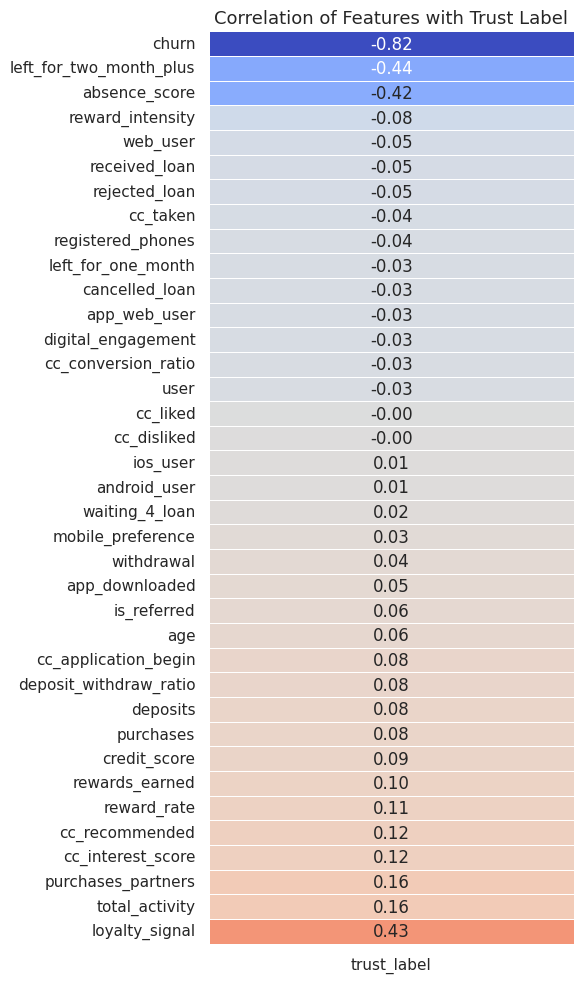

In [13]:
# Correlation with Trust Label
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation with trust_label only
trust_corr = (
    df_fe
    .select_dtypes(include=["int64", "float64"])
    .corr()["trust_label"]
    .drop("trust_label")
    .sort_values()
)

plt.figure(figsize=(6,10))
sns.heatmap(
    trust_corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar=False
)

plt.title("Correlation of Features with Trust Label", fontsize=13)
plt.tight_layout()
plt.show()


# Step 5: Trust Target Variable Construction

In [14]:
df_trust = df.copy()

# Strong behavioral trust definition
trusted_condition = (
    (df_trust["churn"] == 0) &
    (df_trust["left_for_two_month_plus"] == 0) &
    (df_trust["app_downloaded"] == 1) &
    (
        (df_trust["cc_taken"] >= 1) |
        (df_trust["received_loan"] == 1) |
        (df_trust["rewards_earned"].fillna(0) > 0)
    )
)

df_trust["trust_label"] = trusted_condition.astype(int)

# -----------------------------
# Diagnostics
# -----------------------------
print("Trust Label Distribution (Count):")
print(df_trust["trust_label"].value_counts())

print("\nTrust Label Distribution (Percentage):")
print(df_trust["trust_label"].value_counts(normalize=True) * 100)

print("\nChurn vs Trust Label:")
print(pd.crosstab(
    df_trust["churn"],
    df_trust["trust_label"],
    normalize="index"
) * 100)


Trust Label Distribution (Count):
trust_label
0    15106
1    11436
Name: count, dtype: int64

Trust Label Distribution (Percentage):
trust_label
0    56.913571
1    43.086429
Name: proportion, dtype: float64

Churn vs Trust Label:
trust_label           0          1
churn                             
0             25.585632  74.414368
1            100.000000   0.000000


# Step 6: Feature Selection and Target Separation

In [15]:
# Work on the trust-engineered dataframe
df_fe = df_trust.copy()

# Drop non-informative / leakage columns
drop_cols = [
    "user",                     # identifier
    "churn",                    # used in trust construction (leakage)
    "left_for_two_month_plus"   # used in trust construction (leakage)
]

df_fe = df_fe.drop(columns=[c for c in drop_cols if c in df_fe.columns])

# Define target and features
y = df_fe["trust_label"]
X = df_fe.drop(columns=["trust_label"])

# Sanity checks
print("Final Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

print("\nTarget Distribution (%):")
print(y.value_counts(normalize=True) * 100)

print("\nFeature Columns:")
print(list(X.columns))


Final Feature Matrix Shape: (26542, 28)
Target Vector Shape: (26542,)

Target Distribution (%):
trust_label
0    56.913571
1    43.086429
Name: proportion, dtype: float64

Feature Columns:
['age', 'housing', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign', 'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred']


# Step 7: Train–Test Split

In [16]:
from sklearn.model_selection import train_test_split

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Sanity checks
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nTraining target distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest target distribution (%):")
print(y_test.value_counts(normalize=True) * 100)


Training set shape: (19906, 28)
Test set shape: (6636, 28)

Training target distribution (%):
trust_label
0    56.912489
1    43.087511
Name: proportion, dtype: float64

Test target distribution (%):
trust_label
0    56.916817
1    43.083183
Name: proportion, dtype: float64


# Step 8: Data Preprocessing Pipeline


In [17]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify feature types
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

print("Numeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))

# Numeric preprocessing
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    ))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="drop"
)

# Fit on training, transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Final shape check
print("\nProcessed Training Shape:", X_train_processed.shape)
print("Processed Test Shape:", X_test_processed.shape)


Numeric Features: ['age', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred']
Categorical Features: ['housing', 'payment_type', 'zodiac_sign']

Processed Training Shape: (19906, 46)
Processed Test Shape: (6636, 46)


# Step 9: Train, Tune, and Evaluate ML Models

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

# Model definitions
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        solver="lbfgs",
        n_jobs=-1
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=20,
        min_samples_split=8,
        min_samples_leaf=4,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric="logloss",
        tree_method="hist",
        random_state=42
    )
}

# Train and evaluate
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Results summary
results_df = pd.DataFrame(results).sort_values(
    by="Accuracy", ascending=False
).reset_index(drop=True)

results_df



Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...


,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.726793,0.650115,0.792235,0.714173
1,Gradient Boosting,0.726643,0.675277,0.704092,0.689384
2,Random Forest,0.719861,0.637514,0.810773,0.713780
3,Logistic Regression,0.655365,0.584515,0.691850,0.633670


In [19]:

# Separate Model: Support Vector Machine


from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

print("Training Support Vector Machine (Linear SVM)...")

# Define model
svm_model = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)

# Train
svm_model.fit(X_train_processed, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_processed)

# Evaluate
svm_results = pd.DataFrame([{
    "Model": "Support Vector Machine (Linear)",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm)
}])

svm_results


Training Support Vector Machine (Linear SVM)...


,Model,Accuracy,Precision,Recall,F1-Score
0,Support Vector Machine (Linear),0.650995,0.579876,0.689402,0.629914


# CatBoost Model: Training, Evaluation, and Explainability

0:	test: 0.7156359	best: 0.7156359 (0)	total: 27.3ms	remaining: 13.6s
100:	test: 0.7862947	best: 0.7862947 (100)	total: 2.75s	remaining: 10.9s
200:	test: 0.7937276	best: 0.7937276 (200)	total: 5.35s	remaining: 7.96s
300:	test: 0.7998473	best: 0.7998473 (300)	total: 7.98s	remaining: 5.27s
400:	test: 0.8029686	best: 0.8029686 (400)	total: 11.2s	remaining: 2.75s
499:	test: 0.8046660	best: 0.8046993 (496)	total: 14.3s	remaining: 0us

bestTest = 0.8046993442
bestIteration = 496

Shrink model to first 497 iterations.


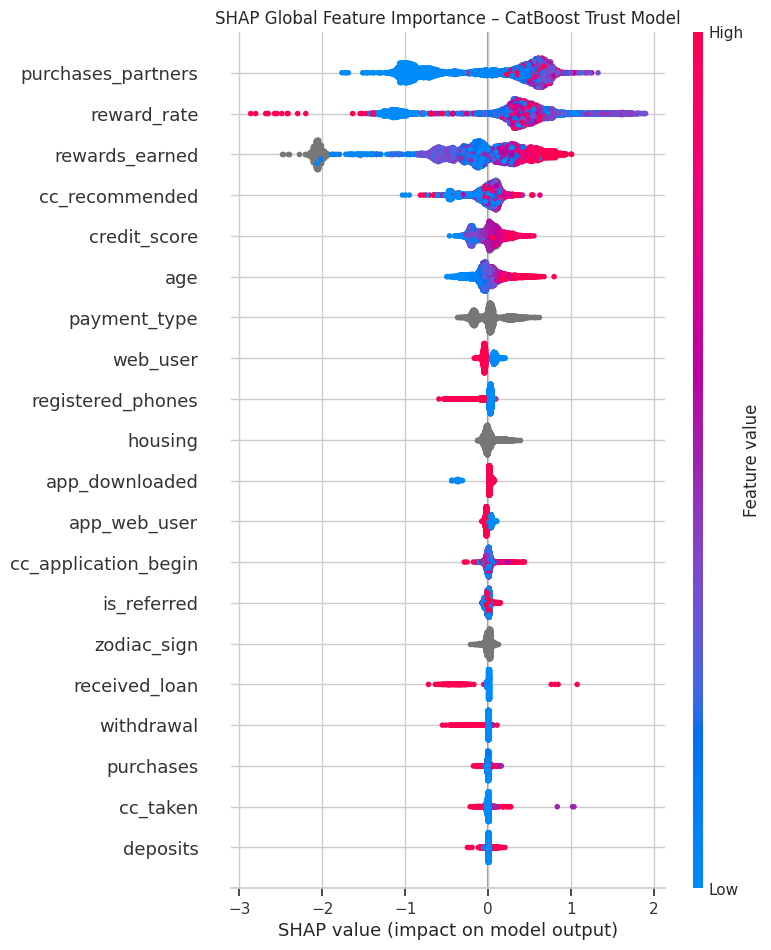

In [21]:
# CatBoost Model: Training, Evaluation, and Explainability

# Install CatBoost (run once in Colab)
!pip install -q catboost shap

# Imports
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap
import matplotlib.pyplot as plt

# Identify categorical features (native CatBoost handling)
categorical_features = ['housing', 'payment_type', 'zodiac_sign']
cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Train CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1, 1.3],
    random_seed=42,
    verbose=100
)

cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_feature_indices,
    eval_set=(X_test, y_test),
    use_best_model=True
)

# Predictions and evaluation
y_pred_cat = cat_model.predict(X_test)

catboost_results = {
    "Model": "CatBoost",
    "Accuracy": accuracy_score(y_test, y_pred_cat),
    "Precision": precision_score(y_test, y_pred_cat),
    "Recall": recall_score(y_test, y_pred_cat),
    "F1-Score": f1_score(y_test, y_pred_cat)
}

catboost_results_df = pd.DataFrame([catboost_results])
catboost_results_df

# Append to overall results table (if exists)
if 'results_df' in globals():
    results_df = pd.concat(
        [results_df, catboost_results_df],
        ignore_index=True
    ).sort_values(by="Accuracy", ascending=False)
    results_df
else:
    results_df = catboost_results_df
    results_df

# Explainable AI using SHAP (CatBoost native support)

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Global explanation
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Global Feature Importance – CatBoost Trust Model")
plt.show()




# Step 10: Model Evaluation and Interpretation (XGBoost)

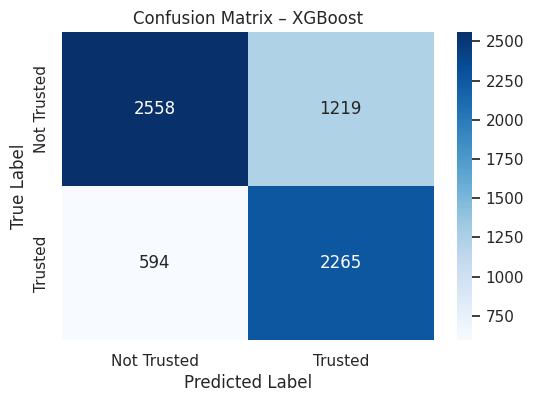

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Re-train best model (XGBoost)
best_model = models["XGBoost"]
best_model.fit(X_train_processed, y_train)

# Predictions
y_pred = best_model.predict(X_test_processed)
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Trusted", "Trusted"],
    yticklabels=["Not Trusted", "Trusted"]
)
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




In [ ]:
# 2. Classification Report
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred))



Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      3777
           1       0.65      0.79      0.71      2859

    accuracy                           0.73      6636
   macro avg       0.73      0.73      0.73      6636
weighted avg       0.74      0.73      0.73      6636



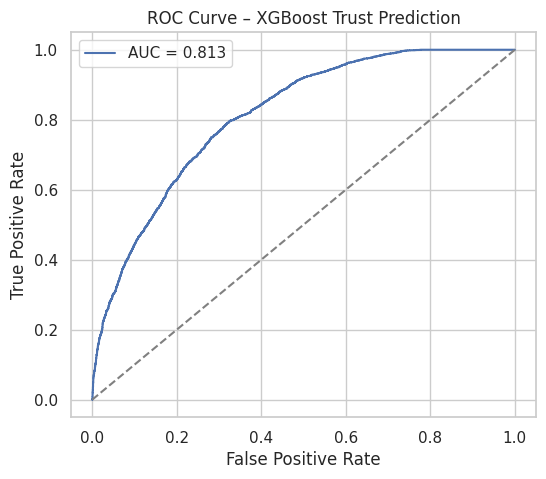

ROC–AUC Score: 0.8127


In [ ]:
# 3. ROC–AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost Trust Prediction")
plt.legend()
plt.show()

print(f"ROC–AUC Score: {auc_score:.4f}")

# Step 11: Explainable AI using SHAP (XGBoost)

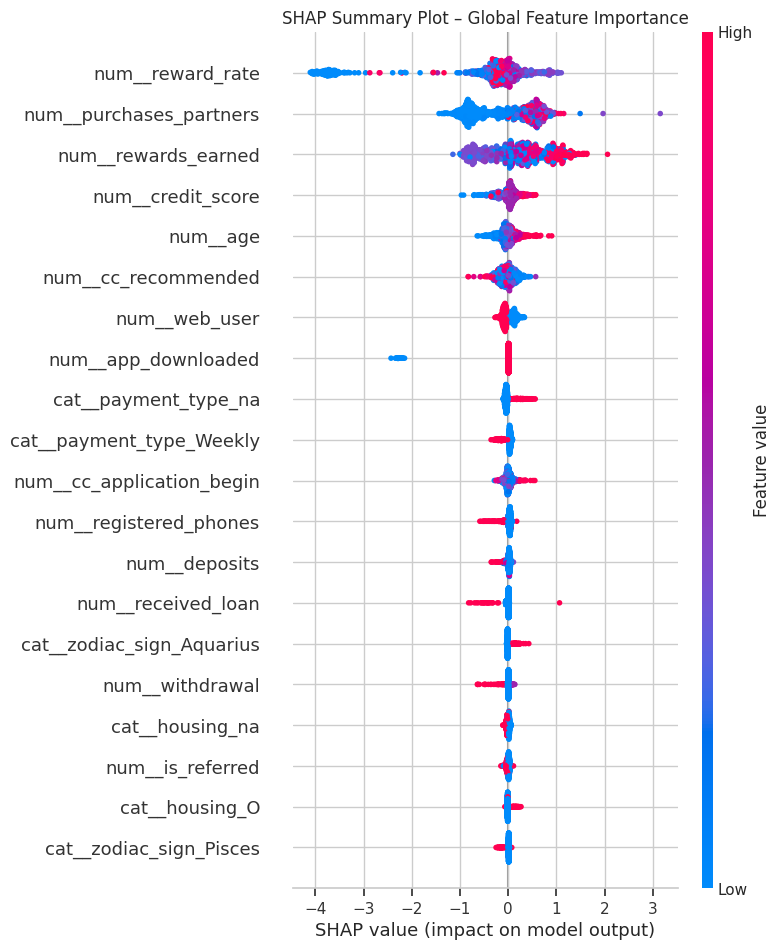

In [ ]:
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt

# Prepare explainer
explainer = shap.TreeExplainer(best_model)

# Use a sample for speed and clarity
sample_size = 1000
X_sample = X_test_processed[:sample_size]

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# 1. Global Feature Importance
plt.figure()
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_names,
    show=False
)
plt.title("SHAP Summary Plot – Global Feature Importance")
plt.show()



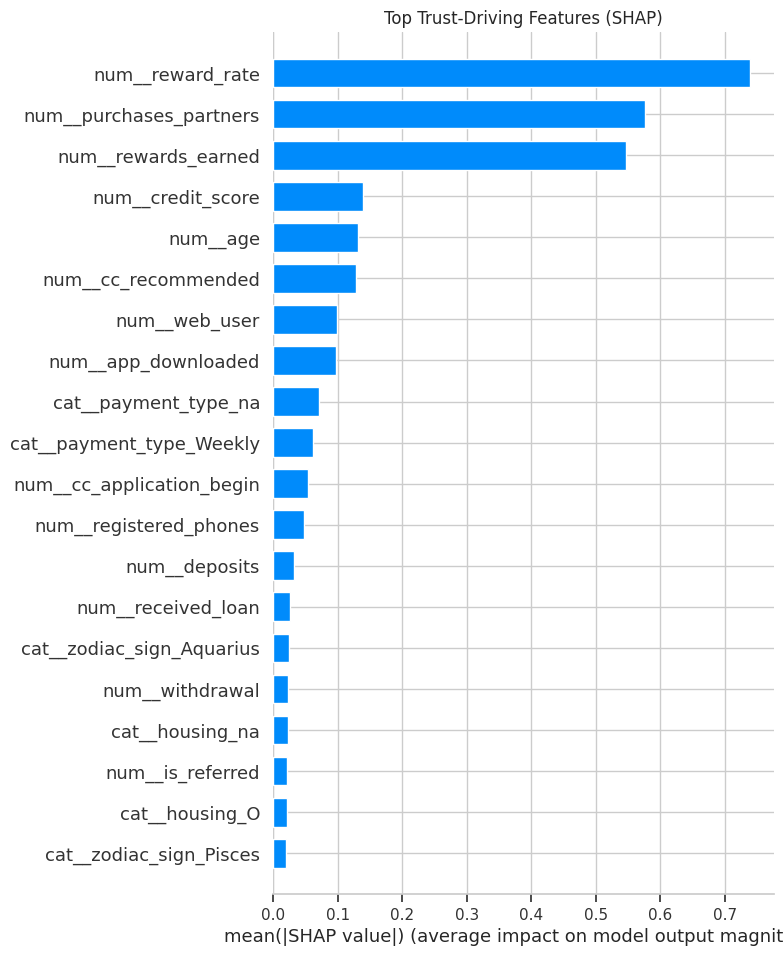

In [ ]:
# 2. Bar Plot of Top Features
plt.figure()
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("Top Trust-Driving Features (SHAP)")
plt.show()


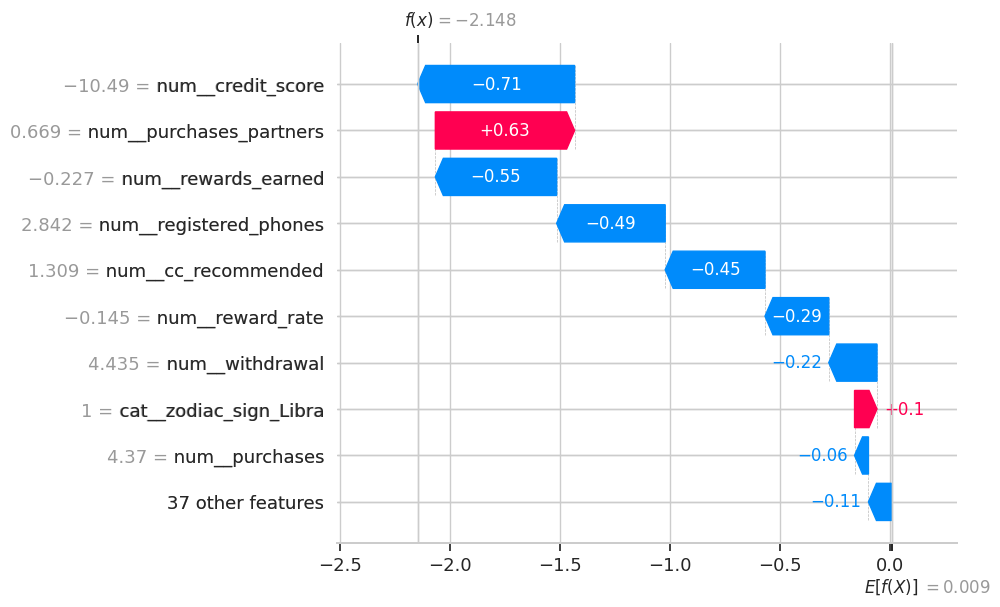

In [ ]:
# 3. Local Explanation: SHAP Waterfall Plot

import shap
import matplotlib.pyplot as plt

# Select instance to explain
instance_id = 0

# Create explanation object
shap_explanation = shap.Explanation(
    values=shap_values[instance_id],
    base_values=explainer.expected_value,
    data=X_sample[instance_id],
    feature_names=feature_names
)

# Waterfall plot (clean, non-overlapping)
plt.figure(figsize=(8, 6))
shap.plots.waterfall(
    shap_explanation,
    max_display=10   # show top 10 features only
)
plt.show()


# Step 12 : Generate Predictions and Probability Outputs

In [ ]:
import pandas as pd
import numpy as np

# Predict trust labels
y_test_pred = best_model.predict(X_test_processed)

# Predict trust probabilities
y_test_proba = best_model.predict_proba(X_test_processed)[:, 1]

# Create prediction results dataframe
prediction_results = pd.DataFrame({
    "actual_trust": y_test.values,
    "predicted_trust": y_test_pred,
    "trust_probability": y_test_proba
})

# Add correctness flag
prediction_results["correct_prediction"] = (
    prediction_results["actual_trust"] == prediction_results["predicted_trust"]
)

# Summary statistics
print("Prediction Results Summary:")
print(prediction_results["correct_prediction"].value_counts(normalize=True) * 100)

print("\nTrust Probability Statistics:")
print(prediction_results["trust_probability"].describe())

# Display sample predictions
prediction_results.head(10)


Prediction Results Summary:
correct_prediction
True     72.679325
False    27.320675
Name: proportion, dtype: float64

Trust Probability Statistics:
count    6636.000000
mean        0.475998
std         0.278928
min         0.000232
25%         0.257771
50%         0.522379
75%         0.697810
max         0.984587
Name: trust_probability, dtype: float64


,actual_trust,predicted_trust,trust_probability,correct_prediction
0,1,0,0.104503,False
1,1,1,0.937773,True
2,0,0,0.454208,True
3,0,0,0.002105,True
4,0,0,0.109768,True
5,1,1,0.895778,True
6,1,1,0.501596,True
7,0,0,0.089333,True
8,0,1,0.544561,False
9,0,0,0.414006,True
